In [60]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.tag import pos_tag
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alexa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df = pd.read_csv("C:/Users/alexa/Desktop/IR_Climate_Change/files/articles.csv")

In [21]:
df.shape

(1285, 5)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285 entries, 0 to 1284
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1285 non-null   object
 1   date       1285 non-null   object
 2   category   1285 non-null   object
 3   summary    1283 non-null   object
 4   main_text  1285 non-null   object
dtypes: object(5)
memory usage: 50.3+ KB


In [23]:
nan_cases = df[pd.isnull(df["summary"])]
print(nan_cases)
for title in nan_cases["title"]:
    print(title)

                                                  title            date  \
1247  Children's access to safe water and sanitation...  29 August 2017   
1248  At start of World Water Week, UN Assembly Pres...  28 August 2017   

                     category summary  \
1247  Climate and Environment     NaN   
1248  Climate and Environment     NaN   

                                              main_text  
1247  “Children's access to safe water and sanitatio...  
1248  “None should imagine that the state of sanitat...  
Children's access to safe water and sanitation is a right, not a privilege – UNICEF
At start of World Water Week, UN Assembly President says water and sanitation goals need 'major push'


In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
unique_categories = df['category'].unique()
second_category = unique_categories[1]
df = df[df['category'] == second_category]
df = df.reset_index(drop=True)

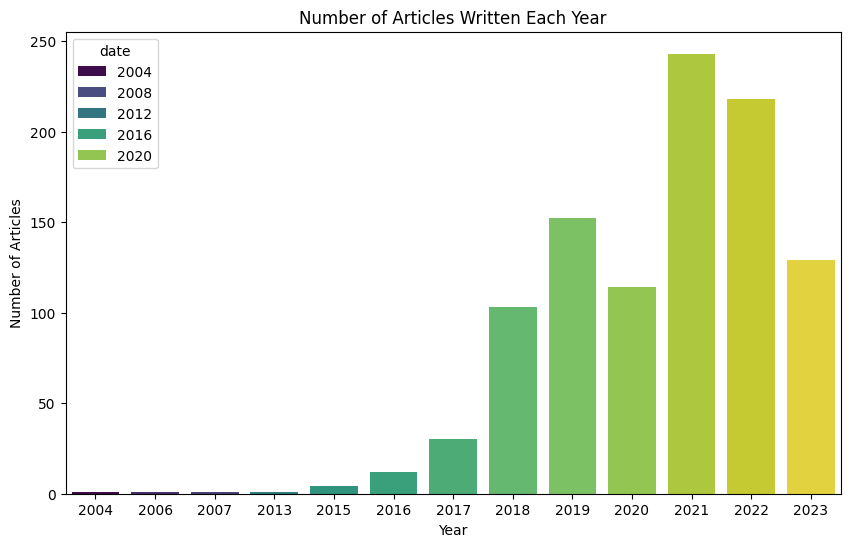

In [26]:
df_grouped = df.groupby(df['date'].dt.year).count()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped.index, y=df_grouped.main_text, palette="viridis", hue=df_grouped.index)
plt.title("Number of Articles Written Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.show()

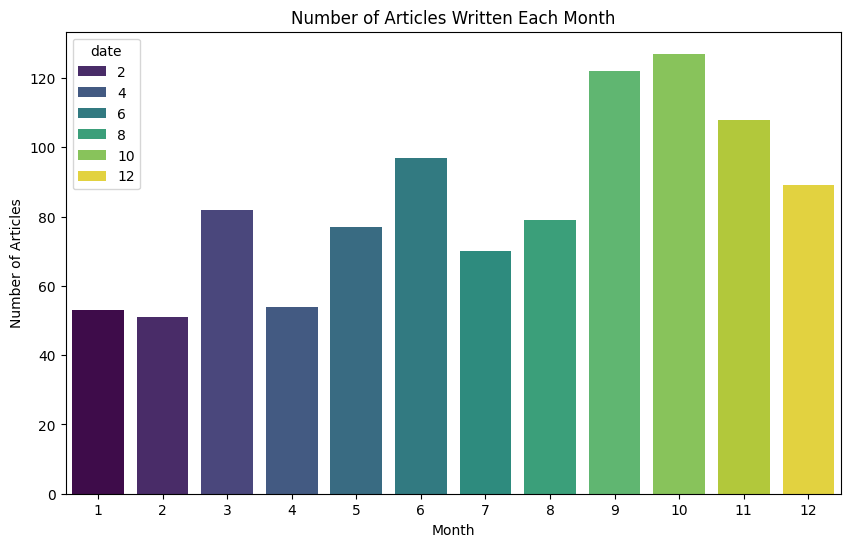

In [27]:
df_grouped = df.groupby(df['date'].dt.month).count()
plt.figure(figsize=(10, 6))
sns.barplot(x=df_grouped.index, y=df_grouped.main_text, palette="viridis", hue=df_grouped.index)
plt.title("Number of Articles Written Each Month")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.show()

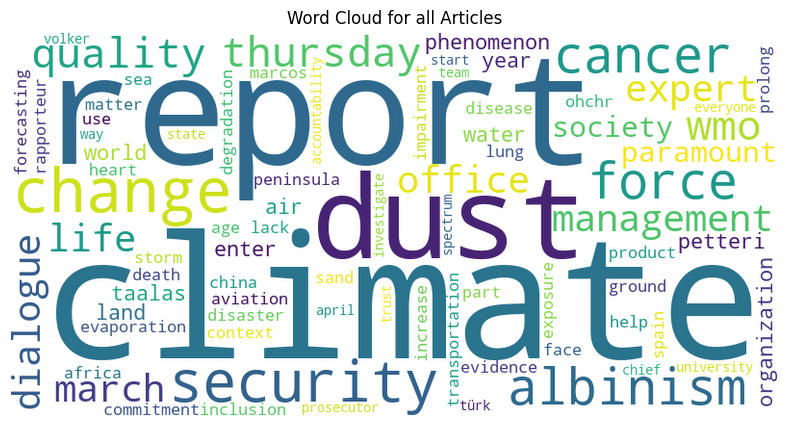

In [51]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    words = [word for (word, pos) in nltk.pos_tag(words) if pos=="NN"]
    return words

df['new_main_text'] = df['main_text'].apply(preprocess_text)
#df['new_summary'] = df['summary'].apply(preprocess_text)

text = ' '.join(df['new_main_text'].iloc[0])
for art in range(1,len(df["new_main_text"])):
    try:
        line = ' '.join(art)
        text = text + ' ' + line
    except:
        pass
    
    
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='lanczos')
plt.title('Word Cloud for all Articles')
plt.axis("off")
plt.show()